In [26]:
import sys
sys.path.append("..")
import grouping_cascades
import readout
import gen_weightedMaxCut
import qiskit as qk
import networkx as nx
from qiskit.visualization import circuit_drawer
from qiskit.quantum_info import Statevector
import numpy as np
import matplotlib.pyplot as plt
import random

The purpose of this notebook is to provide a few examples of QAOA instances for weighted Max Cut which are small enough such that one can run them locally. Nevertheless they are large enough that parallelization is employed ($q>18$).

### $q=20$ sizes=[10,10], $p_{inter}=0.1$, single layer QAOA

Cascades prior to limiting their size
('1', [(1, 11), (1, 16)])
('7', [(7, 10), (7, 14)])
('9', [(9, 17), (9, 19)])
('11s0', [(8, 15)])
('remainder', [(0, 1), (0, 2), (0, 3), (0, 5), (0, 7), (0, 8), (1, 2), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 8), (3, 9), (4, 7), (4, 9), (5, 6), (5, 7), (5, 9), (6, 9), (7, 8), (7, 9), (8, 9), (10, 11), (10, 12), (10, 13), (10, 14), (10, 16), (10, 17), (10, 19), (11, 12), (11, 13), (11, 14), (11, 15), (11, 16), (11, 17), (11, 19), (12, 13), (12, 16), (12, 17), (12, 18), (12, 19), (13, 14), (13, 15), (13, 16), (13, 18), (14, 15), (14, 16), (14, 17), (14, 19), (15, 17), (15, 18), (15, 19), (16, 17), (16, 18), (16, 19), (17, 18), (18, 19)])
Cascades after limiting their size
('remainder', [(0, 1), (0, 2), (0, 3), (0, 5), (0, 7), (0, 8), (1, 2), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 8), 

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


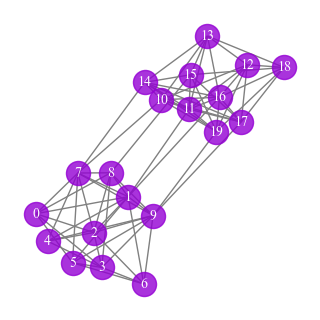

Circuit written into grouping_noblock_q20_cutloc9_blockgraph_seed5_sizes_10_10_angles_268500_198200_pinter010_pintra080_weights
Circuit written into grouping_block_q20_cutloc9_blockgraph_seed5_sizes_10_10_angles_268500_198200_pinter010_pintra080_weights


In [27]:
q = 20
seed = 5
cut_loc = 9
sizes = [10,10]
p_intra = 0.8
p_inter = 0.1
angles = [2.685,1.982]
save_plot = False
verbose = True
weights = []

maxcut = gen_weightedMaxCut.WeightedMaxCut(q, seed, cut_loc, sizes, p_intra, p_inter, angles, save_plot, verbose, weights)
maxcut.run_all()

In [28]:
%%bash
#!/bin/bash

d_flag=1000
q=20
t=8
r_block=4
cutloc=9
k_values="0,1,2,3,4,5,6,7,8,9"
seed=5
sizes="10_10"
angles="268500_198200"
pinter="010"
pintra="080"

reps=5

circname_noblock="grouping_noblock_q${q}_cutloc${cutloc}_blockgraph_seed${seed}_sizes_${sizes}_angles_${angles}_pinter${pinter}_pintra${pintra}_weights"
circname_block="grouping_block_q${q}_cutloc${cutloc}_blockgraph_seed${seed}_sizes_${sizes}_angles_${angles}_pinter${pinter}_pintra${pintra}_weights"


for (( i=0; i<reps; i++)); do
    #run example with cut but no block
    filename0="times_noblock_q${q}_cutloc${cutloc}_blockgraph_seed${seed}_sizes_${sizes}_angles_${angles}_pinter${pinter}_pintra${pintra}_weights_rep${i}.tlog"
    amps0="amplitudes_noblock_q${q}_cutloc${cutloc}_blockgraph_seed${seed}_sizes_${sizes}_angles_${angles}_pinter${pinter}_pintra${pintra}_weights_rep${i}.log"
    echo "Starting Cut (no block)..."
    ../../apps/qsimh_amplitudes.x -c ${circname_noblock} -d ${d_flag} -k ${k_values} -t ${t} -w 0 -p 0 -r ${r_block}  -i ../../circuits/bitstrings_q${q} -o "$amps0" -v 1 > "$filename0"
    echo "Completed: $filename0"
done

for (( i=0; i<reps; i++)); do
    #run example with cut but no block
    filename1="times_block_q${q}_cutloc${cutloc}_blockgraph_seed${seed}_sizes_${sizes}_angles_${angles}_pinter${pinter}_pintra${pintra}_weights_rep${i}.tlog"
    amps1="amplitudes_block_q${q}_cutloc${cutloc}_blockgraph_seed${seed}_sizes_${sizes}_angles_${angles}_pinter${pinter}_pintra${pintra}_weights_rep${i}.log"
    echo "Starting Cut (block)..."
    ../../apps/qsimh_amplitudes.x -c ${circname_block} -d 100 -k ${k_values} -t ${t} -w 0 -p 0 -r ${r_block}  -i ../../circuits/bitstrings_q${q} -o "$amps1" -v 1 > "$filename1"
    echo "Completed: $filename1"
done

for (( i=0; i<reps; i++ )); do
    # Run example without cut
    filename2="times_nocut_q${q}_cutloc${cutloc}_blockgraph_seed${seed}_sizes_${sizes}_angles_${angles}_pinter${pinter}_pintra${pintra}_weights_rep${i}.tlog"
    amps2="amplitudes_nocut_q${q}_cutloc${cutloc}_blockgraph_seed${seed}_sizes_${sizes}_angles_${angles}_pinter${pinter}_pintra${pintra}_weights_rep${i}.log"
    echo "Starting no cut..."
    ../../apps/qsim_amplitudes.x -c ${circname_noblock} -d ${d_flag} -i ../../circuits/bitstrings_q${q} -o "$amps2" -v 2 -t ${t} > "$filename2"
    echo "Completed: $filename2"
done

Starting Cut (no block)...
Completed: times_noblock_q20_cutloc9_blockgraph_seed5_sizes_10_10_angles_268500_198200_pinter010_pintra080_weights_rep0.tlog
Starting Cut (no block)...
Completed: times_noblock_q20_cutloc9_blockgraph_seed5_sizes_10_10_angles_268500_198200_pinter010_pintra080_weights_rep1.tlog
Starting Cut (no block)...
Completed: times_noblock_q20_cutloc9_blockgraph_seed5_sizes_10_10_angles_268500_198200_pinter010_pintra080_weights_rep2.tlog
Starting Cut (no block)...
Completed: times_noblock_q20_cutloc9_blockgraph_seed5_sizes_10_10_angles_268500_198200_pinter010_pintra080_weights_rep3.tlog
Starting Cut (no block)...
Completed: times_noblock_q20_cutloc9_blockgraph_seed5_sizes_10_10_angles_268500_198200_pinter010_pintra080_weights_rep4.tlog
Starting Cut (block)...
Completed: times_block_q20_cutloc9_blockgraph_seed5_sizes_10_10_angles_268500_198200_pinter010_pintra080_weights_rep0.tlog
Starting Cut (block)...
Completed: times_block_q20_cutloc9_blockgraph_seed5_sizes_10_10_angle

In [29]:

#amplitude checking and readout of times
i=0
num_amps=1000000
t=8

sizes="10_10"
angles="268500_198200"
pinter="010"
pintra="080"

amps_nocut = f"amplitudes_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes_{sizes}_angles_{angles}_pinter{pinter}_pintra{pintra}_weights_rep{i}.log"
amps_block = f"amplitudes_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes_{sizes}_angles_{angles}_pinter{pinter}_pintra{pintra}_weights_rep{i}.log"
amps_noblock = f"amplitudes_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes_{sizes}_angles_{angles}_pinter{pinter}_pintra{pintra}_weights_rep{i}.log"

readout.compare_files(amps_block, amps_nocut)
readout.compare_files(amps_noblock, amps_nocut)

#print times
reps=5
suffix = ""
path_nocut = f"times_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes_{sizes}_angles_{angles}_pinter{pinter}_pintra{pintra}_weights"
path_block = f"times_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes_{sizes}_angles_{angles}_pinter{pinter}_pintra{pintra}_weights"
path_noblock = f"times_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes_{sizes}_angles_{angles}_pinter{pinter}_pintra{pintra}_weights"
readout.print_diffs(reps, path_nocut, path_block, path_noblock, suffix)


All fine within the given tolerance 1e-07
All fine within the given tolerance 1e-07
--------Full times---------
No cut: Mean =1.4815520000000002, std=0.026554307673144054
Block: Mean =0.06975069999999998, std=0.017926154856633365
No Block: Mean =0.3334632, std=0.07082999088352335
--------Sim times---------
No cut: Mean =1.477008, std=0.02618869481283863
Block: Mean =0.0644581, std=0.01764107349942174
No Block: Mean =0.3289734, std=0.07059976023925295
-----Paths-----
Block: 16
No Block: 128
--------Ratios--------
S/J = 21.240675720817148
T/J = 4.780786429383506


### $q=20$ sizes=[10,10], $p_{inter}=0.15$, single layer QAOA

Cascades prior to limiting their size
('11', [(0, 11), (2, 11), (5, 11)])
('15', [(5, 15), (8, 15), (9, 15)])
('6', [(6, 10), (6, 17), (6, 18)])
('4', [(4, 10), (4, 13)])
('10s0', [(7, 19)])
('5s0', [(9, 18)])
('remainder', [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 5), (2, 6), (2, 7), (2, 8), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 9), (5, 6), (5, 8), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9), (10, 11), (10, 12), (10, 13), (10, 14), (10, 16), (10, 17), (10, 18), (10, 19), (11, 12), (11, 13), (11, 14), (11, 15), (11, 16), (11, 17), (11, 18), (12, 14), (12, 16), (12, 17), (12, 19), (13, 14), (13, 16), (13, 18), (13, 19), (14, 15), (14, 16), (14, 17), (14, 19), (15, 16), (15, 17), (15, 18), (15, 19), (16, 17), (16, 18), (16, 19), (17, 19), (18, 19)])
Cascades after limiting their size
('remainder', [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


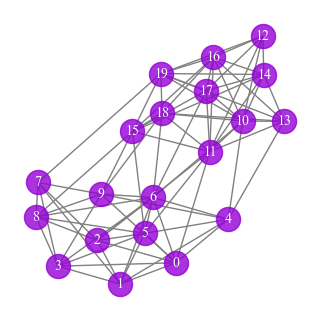

Circuit written into grouping_noblock_q20_cutloc9_blockgraph_seed4_sizes_10_10_angles_268500_198200_pinter015_pintra080_weights
Circuit written into grouping_block_q20_cutloc9_blockgraph_seed4_sizes_10_10_angles_268500_198200_pinter015_pintra080_weights


In [30]:
q = 20
seed = 4
cut_loc = 9
sizes = [10,10]
p_intra = 0.8
p_inter = 0.15
angles = [2.685, 1.982]
save_plot = False
verbose = True
weights = []

maxcut = gen_weightedMaxCut.WeightedMaxCut(q, seed, cut_loc, sizes, p_intra, p_inter, angles, save_plot, verbose, weights)
maxcut.run_all()

In [31]:
%%bash
#!/bin/bash

d_flag=1000
q=20
t=8
r_block=4
cutloc=9
k_values="0,1,2,3,4,5,6,7,8,9"
seed=4
sizes="10_10"
angles="268500_198200"
pinter="015"
pintra="080"

reps=2

circname_noblock="grouping_noblock_q${q}_cutloc${cutloc}_blockgraph_seed${seed}_sizes_${sizes}_angles_${angles}_pinter${pinter}_pintra${pintra}_weights"
circname_block="grouping_block_q${q}_cutloc${cutloc}_blockgraph_seed${seed}_sizes_${sizes}_angles_${angles}_pinter${pinter}_pintra${pintra}_weights"


for (( i=0; i<reps; i++)); do
    #run example with cut but no block
    filename0="times_noblock_q${q}_cutloc${cutloc}_blockgraph_seed${seed}_sizes_${sizes}_angles_${angles}_pinter${pinter}_pintra${pintra}_weights_rep${i}.tlog"
    amps0="amplitudes_noblock_q${q}_cutloc${cutloc}_blockgraph_seed${seed}_sizes_${sizes}_angles_${angles}_pinter${pinter}_pintra${pintra}_weights_rep${i}.log"
    echo "Starting Cut (no block)..."
    ../../apps/qsimh_amplitudes.x -c ${circname_noblock} -d ${d_flag} -k ${k_values} -t ${t} -w 0 -p 0 -r ${r_block}  -i ../../circuits/bitstrings_q${q} -o "$amps0" -v 1 > "$filename0"
    echo "Completed: $filename0"
done

for (( i=0; i<reps; i++)); do
    #run example with cut but no block
    filename1="times_block_q${q}_cutloc${cutloc}_blockgraph_seed${seed}_sizes_${sizes}_angles_${angles}_pinter${pinter}_pintra${pintra}_weights_rep${i}.tlog"
    amps1="amplitudes_block_q${q}_cutloc${cutloc}_blockgraph_seed${seed}_sizes_${sizes}_angles_${angles}_pinter${pinter}_pintra${pintra}_weights_rep${i}.log"
    echo "Starting Cut (block)..."
    ../../apps/qsimh_amplitudes.x -c ${circname_block} -d 100 -k ${k_values} -t ${t} -w 0 -p 0 -r ${r_block}  -i ../../circuits/bitstrings_q${q} -o "$amps1" -v 1 > "$filename1"
    echo "Completed: $filename1"
done

for (( i=0; i<reps; i++ )); do
    # Run example without cut
    filename2="times_nocut_q${q}_cutloc${cutloc}_blockgraph_seed${seed}_sizes_${sizes}_angles_${angles}_pinter${pinter}_pintra${pintra}_weights_rep${i}.tlog"
    amps2="amplitudes_nocut_q${q}_cutloc${cutloc}_blockgraph_seed${seed}_sizes_${sizes}_angles_${angles}_pinter${pinter}_pintra${pintra}_weights_rep${i}.log"
    echo "Starting no cut..."
    ../../apps/qsim_amplitudes.x -c ${circname_noblock} -d ${d_flag} -i ../../circuits/bitstrings_q${q} -o "$amps2" -v 2 -t ${t} > "$filename2"
    echo "Completed: $filename2"
done

Starting Cut (no block)...


Completed: times_noblock_q20_cutloc9_blockgraph_seed4_sizes_10_10_angles_268500_198200_pinter015_pintra080_weights_rep0.tlog
Starting Cut (no block)...
Completed: times_noblock_q20_cutloc9_blockgraph_seed4_sizes_10_10_angles_268500_198200_pinter015_pintra080_weights_rep1.tlog
Starting Cut (block)...
Completed: times_block_q20_cutloc9_blockgraph_seed4_sizes_10_10_angles_268500_198200_pinter015_pintra080_weights_rep0.tlog
Starting Cut (block)...
Completed: times_block_q20_cutloc9_blockgraph_seed4_sizes_10_10_angles_268500_198200_pinter015_pintra080_weights_rep1.tlog
Starting no cut...
Completed: times_nocut_q20_cutloc9_blockgraph_seed4_sizes_10_10_angles_268500_198200_pinter015_pintra080_weights_rep0.tlog
Starting no cut...
Completed: times_nocut_q20_cutloc9_blockgraph_seed4_sizes_10_10_angles_268500_198200_pinter015_pintra080_weights_rep1.tlog


In [33]:

#amplitude checking and readout of times
i=0
num_amps=1000000
t=8

sizes="10_10"
angles="268500_198200"
pinter="015"
pintra="080"

amps_nocut = f"amplitudes_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes_{sizes}_angles_{angles}_pinter{pinter}_pintra{pintra}_weights_rep{i}.log"
amps_block = f"amplitudes_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes_{sizes}_angles_{angles}_pinter{pinter}_pintra{pintra}_weights_rep{i}.log"
amps_noblock = f"amplitudes_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes_{sizes}_angles_{angles}_pinter{pinter}_pintra{pintra}_weights_rep{i}.log"

print("block v.s. no cut")
readout.compare_files(amps_block, amps_nocut)
print("noblock vs no cut")
readout.compare_files(amps_noblock, amps_nocut)

#print times
reps=2
suffix = ""
path_nocut = f"times_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes_{sizes}_angles_{angles}_pinter{pinter}_pintra{pintra}_weights"
path_block = f"times_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes_{sizes}_angles_{angles}_pinter{pinter}_pintra{pintra}_weights"
path_noblock = f"times_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes_{sizes}_angles_{angles}_pinter{pinter}_pintra{pintra}_weights"
readout.print_diffs(reps, path_nocut, path_block, path_noblock, suffix)


block v.s. no cut
All fine within the given tolerance 1e-07
noblock vs no cut
All fine within the given tolerance 1e-07
--------Full times---------
No cut: Mean =1.489835, std=0.04715500000000006
Block: Mean =0.323898, std=0.0038930000000000076
No Block: Mean =15.18405, std=0.06725000000000048
--------Sim times---------
No cut: Mean =1.4853450000000001, std=0.047254999999999936
Block: Mean =0.17567300000000002, std=9.699999999999986e-05
No Block: Mean =15.168849999999999, std=0.0647499999999992
-----Paths-----
Block: 64
No Block: 8192
--------Ratios--------
S/J = 4.5997042278742075
T/J = 46.87911009021358
